# <span style="color:purple"> Week 5 - Sampling & Reliability
### <span style="color:purple">World of Cooking</span>  
<span style="color:purple">-- File: Jingying (Jane) Bi Homework 5 <br>
-- Name: Jingying Bi <br>
-- UCID: 12174556 <br>
<br>
    
<span style="color:purple">**Research Problem:** <br>
How did the financial crisis affect the sentiments of business/ financial markets? 
    
<span style="color:purple">**Dataset:** <br>
<span style="color:purple"> My dataset is small, a 10x8 matrix. But this is sufficient to measure the degree of agreements among different experimenters. I used MTurk to hire 8 exerimenters to read 10 pieces of texts for me. All texts are selected from the Reuters Newspaper during 2007~2009. They are either business news, financial news, or snapshot of economics news. Exerimenters were required to read the text first, then fill up the sentiment evaluation -- *This paragraph is describing a/an ___ phenomenon.* Choices are -2 (Terrible), -1 (Bad), 0 (Neutral), 1 (Good), 2 (Excellent). 99 in the 10x8 matrix are the missing values. The result is saved in the *HW5_Sentiment_Evaluation.csv*, also shown in the picture below. <br>
Last but not least, I ask them "Do you enjoy this survey?", given choices "Yes", "No", "Just so so". 6 out of 8 chose "Yes", and 2 chose "Just so so." This sort of tells me that they are not randomly taking my survey, which grants the quality of my survey results. <br>

<span style="color:purple">**Images:** <br>
<span style="color:purple"> [LEFT] S&P 500, [MIDDLE] DJI, [RIGHT] Survey Results. <br> 
The trends look similar -- started to drop at the second half of 2007, reached the trough at the end of 2008, and get recovered since 2009. The hypothesis is that volatility in the stocks market could be affect as well as reflect people's current sentiments. <br>

<img src="../5-Reliability/HW5_Plot.png" width="900">

### <span style="color:purple"> Load Packages

In [21]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
import numpy as np #For arrays
import scipy as sp #For some stats
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import pyanno #On python3 make sure to pip install pyanno3

#We need to import these this way due to how pyanno is setup
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math


#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

## <span style="color:red">*Pitch Your Project*</span>

<span style="color:red">In the three cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words), **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words), and **HOW** you plan to investigate it (i.e., what are the approaches and operations you plan to perform, in sequence, to yield this insight) (<400 words).

## <span style="color:purple">***What?***
    
<span style="color:purple">**Research question:**<br> How do the areas of Business & Finance, Science & Technology, and Books & Arts respond to the financial crisis? <br>
**Corpus:** <br> Economists historical articles over 1929-1933 (Great Depression) and 2007-2009 (Financial Crisis).
**Social Game:** <br> financial crisis is not only the crisis in the business and financial areas, but also spills over to other areas such as Science & Technology, and Books & Arts. However, the severity of the crisis in different areas may vary. Hence, I want to study how people in different areas reacted to the crisis by analyzing the Economists publications in those relevant areas. In this case, I assume that what the publications discussed normally reflects what people care most. 
Moreover, different financial crisis could affect the areas in different ways. Hence, if time allows, I will continue the comparative studies between the Great Depression (1929-1933) and the Financial Crisis (2007-2008)

## <span style="color:purple">***Why?***
<span style="color:purple"> Firstly, my study will give a more comprehensive understanding about the effects of financial crisis. Many existing papers studies how the crisis affect the financial area, the small business [(Cole, 2012)](https://www.microbiz.org/wp-content/uploads/2014/04/SBA-SmallBizLending-and-FiscalCrisis.pdf), the insurance industry [(Schich, 2009)](https://www.oecd.org/finance/financial-markets/44260382.pdf) and the consumer behavior [(Mansoor & Jalal, 2011)](https://pdfs.semanticscholar.org/55f8/5c69644c6b13ad414588672138ffdb45c3bf.pdf). But little shed lights on other areas such as Science & Technology, and Books & Arts. They seem to be less relevant to the financial world though, they are still quite close to our daily lives. Secondly, I expect my project to give implications on the social welfare.

## <span style="color:purple">***How?***
<span style="color:purple">(1)	Corpus collection. Clean the corpus and save the texts into a data frame, including the information of Year, Month, Day, Article Title, Article Author, Article Category (Area).<br>
(2)	Classification/ clustering: split articles relevant to the different areas, namely Business & Finance, Science & Technology, and Books & Arts. These are the existing categories set by Economists. Then I will conduct the clustering analysis with k-means because I already know that the number of clusters is 3. Doing this help me visualize how these three areas relate to each other. If the dots representing each article from different areas are mixing or overlapping with each other, then the areas are quite close to each other. In fact, the clusters are expected to be distinct. Closeness of Business & Finance and another area may correlate with how their responses to the crisis are similar (or dissimilar).<br>
(3)	Tokenize and normalize. Filter out the meaningless words such as “a”, “the”, stem the words. This step will reduce the burden of text analysis by extracting the only meaningful words. <br>
(4)	Colocation: To conduct colocation analysis, I could learn what are different areas most care about and discuss about. <br>
(5)	Topic Modeling: What are the main topics discussed in different areas? How close their discussions to the crisis? This measurement gives the extent of different areas’ response to the crisis. <br>
(6)	Sentiment analysis: I need to get two bags of words representing “positive” and “negative” separately. Then I will use them to analyze the sentiments of different areas. In that case, I am assuming that articles in a certain area will be affected by the area’s contemporary phenomenon. Hence, analyzing the articles’ sentiment allows me to know the sentiment of that area. <br>
Moreover, I will plot the sentiment evolution on a time series frame. Then I will compare the three different areas. <br>
(7)	If time allows, do the same analysis for the Great Depression. Then compare the outcomes of the Great Depression with the Financial Crisis. This allows me to study whether different crisis in different era impact the areas in different ways or patterns.<br>


## <span style="color:red">*Pitch Your Sample*</span>

<span style="color:red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors you about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication)? (<200 words).

<span style="color:purple">Some questions have been answered in What? Section. I only answer other questions here.
Limitations: Not sure yet. It is clear that the corpus itself has little limitation as they are the full set of historical articles. 
Alternatives: use other corpus to analyze for robustness checking.
Scale up: conduct the comparative studies among different crisis. They are in different era. They may get different underlying culture, such as the 1997 Asia Financial crisis, and 2009 Europe Debt crisis. How to incorporate the culture factors and the contemporary factors are two potential problems.

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">In the cells immediately following, demonstrate three approaches drawn from any of the last three weeks to create subsamples of your corpus (e.g., for crowd-sourced subcoding like we'll be doing this week). Methods of subsampling include (a) corpus linguistic approaches drawing on word presence or co-presence, conditional frequencies, weighted words (e.g., tf.idf), KL or JS divergences, etc.; (b) hierarchical or flat clustering approaches; (c) topic modeling; or (d) word-embedding. (<200 words).

<span style="color:purple">For details, see How? Section.
Briefing:
Use k-mean clustering to sort out the texts in the 3 areas.  
Tokenize
Normalize (stemming, use English common words list to remove meaningless words)
Tf-Idf to further reduce the dimensionality of the words. 
While doing the sentiment analysis, need topic modeling and KL divergence.

## <span style="color:red">*Excercise 2*</span>

<span style="color:red">Perform a content annotation survey of some kind in which at least 3 people evaluate and code each piece of content, using Amazon Mechanical Turk as described in the MTurk slides on this week's Canvas page.  With the resulting data, calculate, visualize and discuss inter-coder agreement or covariation with appropriate metrics. What does this means for the reliability of human assessments regarding content in your domain?

###  <span style="color:purple"> 2.1 Annotations

In [30]:
# load the numerical results
survey = np.loadtxt("../5-Reliability/Survey.txt")
anno = AnnotationsContainer.from_array(survey, missing_values= [99])
anno.annotations

array([[ 1,  1,  1,  1, -1, -1, -1, -1],
       [ 0,  0,  1,  1, -1, -1, -1, -1],
       [ 4,  4,  4,  4, -1, -1, -1, -1],
       [ 3,  2,  2,  2, -1, -1, -1, -1],
       [ 1,  1,  3,  2, -1, -1, -1, -1],
       [-1, -1, -1, -1,  2,  1,  1,  1],
       [-1, -1, -1, -1,  1,  2,  1,  1],
       [-1, -1, -1, -1,  1,  2,  1,  2],
       [-1, -1, -1, -1,  2,  1,  2,  1],
       [-1, -1, -1, -1,  1,  0,  2,  0]])

In [5]:
anno.labels

[-2.0, -1.0, 0.0, 1.0, 2.0]

 <span style="color:purple"> Now I will conduct the annotation statistics analysis, by assuming the each survey responses is qualitatively distinct from one another. I will measute the agreement between each pair of annotators, menawhile accounting for the agreement occurring by chance in slightly different ways.

In [33]:
# calculate the frequencies for each label. 
pyanno.measures.agreement.labels_frequency(anno.annotations,5)

array([0.1  , 0.475, 0.275, 0.05 , 0.1  ])

### <span style="color:purple"> 2.2 Confusion Matrix 
 <span style="color:purple"> **Concept:** <br>
<span style="color:purple">In the heatplot of the confusion matrix, the diagonal elements represent the number of answers for which the two experiments give the same answer, while off-diagonal elements are those that are different answers. The higher the diagonal values of the confusion matrix the better, indicating many agreements between the two experimenters. <br>
    
<span style="color:purple"> **Findings:** <br>
The heatplots below show that Experimenters 2&3 and 2&4 get most number of same answers, hence 3&4 are good as well though not as agreeable as 2&3 or 2&4. Notice that the heatplot just shows how the numerical values representing the 5 phenomenons differ among different experimenters. It is not showing the extent of the experimenters agreement (see **2.3**) <br>

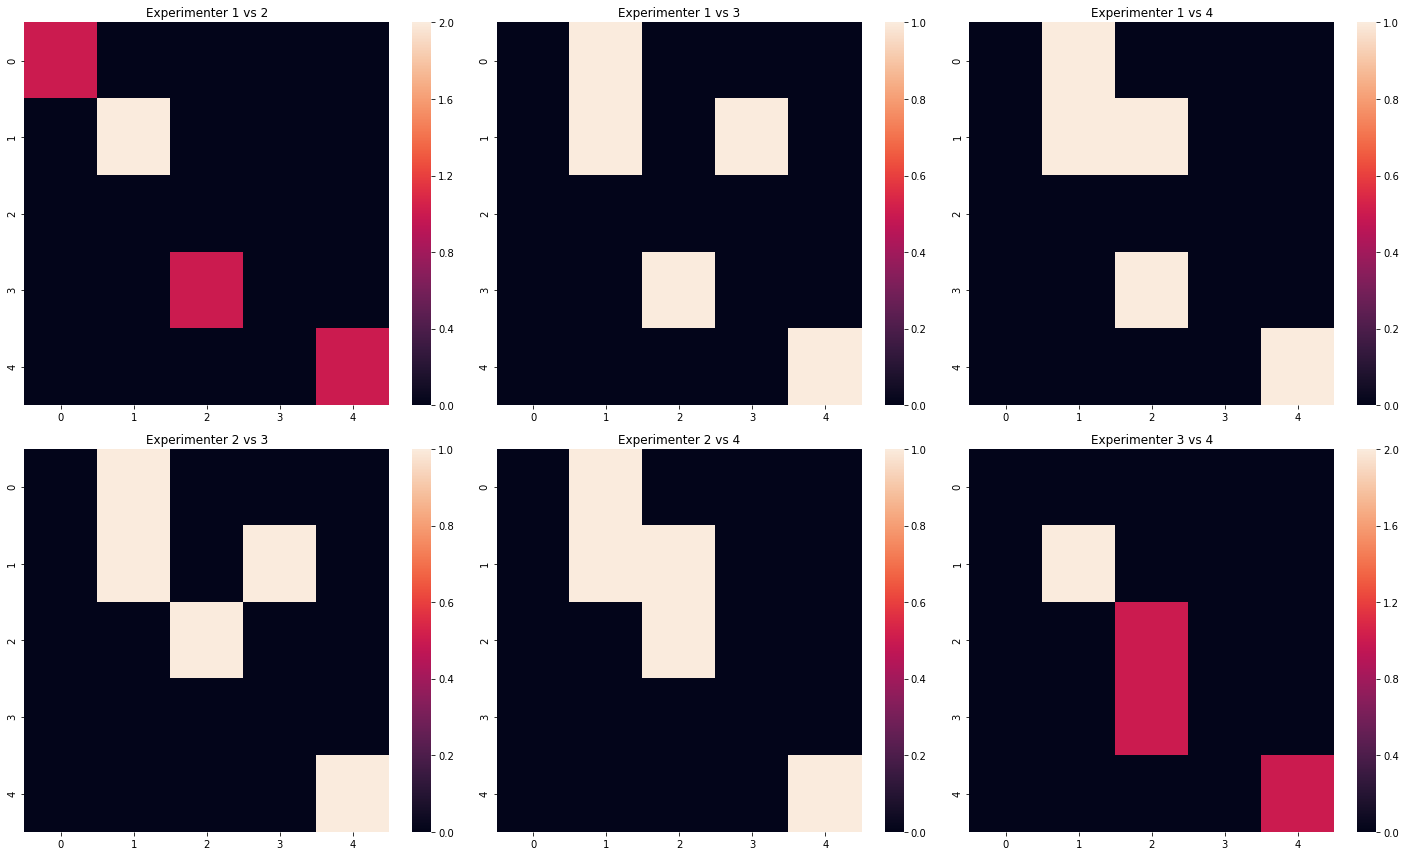

In [34]:
plt.figure(figsize = (20,12))

ax = plt.subplot(231)
# compare experimenter 1 and experimenter 2
c1_2 = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,1],5)
ax = seaborn.heatmap(c1_2)
ax.set_title("Experimenter 1 vs 2")

ax = plt.subplot(232)
# compare experimenter 1 and experimenter 3
c1_3 = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,2],5)
ax = seaborn.heatmap(c1_3)
ax.set_title("Experimenter 1 vs 3")

ax = plt.subplot(233)
# compare experimenter 1 and experimenter 4
c1_4 = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,3],5)
ax = seaborn.heatmap(c1_4)
ax.set_title("Experimenter 1 vs 4")

ax = plt.subplot(234)
# compare experimenter 2 and experimenter 3
c2_3 = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,1], anno.annotations[:,2],5)
ax = seaborn.heatmap(c2_3)
ax.set_title("Experimenter 2 vs 3")

ax = plt.subplot(235)
# compare experimenter 2 and experimenter 4
c2_4 = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,1], anno.annotations[:,3],5)
ax = seaborn.heatmap(c2_4)
ax.set_title("Experimenter 2 vs 4")

ax = plt.subplot(236)
# compare experimenter 3 and experimenter 4
c3_4 = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,2], anno.annotations[:,3],5)
ax = seaborn.heatmap(c3_4)
ax.set_title("Experimenter 3 vs 4")

plt.tight_layout()
plt.show()

### <span style="color:purple">2.3 Scott's $\pi$, Cohen's $\kappa$, and Krippendorff's $\alpha$

<span style="color:purple">**Interesting Question:** <br>
To which extent has the experimenters' agreement been achieved? <br>

<span style="color:purple">**Method:** <br>
<span style="color:purple">To measure the extent of the agreement, I will use different measures, including Scott's $\pi$, Cohen's $\kappa$, and Krippendorff's $\alpha$. <br>
Heatplots display the results. The left heatplot uses scotts pi and the right heatplot uses cohens kappa. <br>


<span style="color:purple">**Findings:** <br>
<span style="color:purple">Note that there are 8 experimenters and 2 versions of survey. Experimenters 1~4 take survey version 1, 5~8 take survey version 2. <br> 
<span style="color:purple">(1) Both heatplots show that the experimenters 1~4 for the survey version 1 (left-upper part) get larger extent of the agreement because on the off-diagonal elements, the values are relatively high. In comparison, the survey version 2 (right-bottom part) has more variations among different experimenters which is indicated by the mix of different colors; and there are more disagreements indicated by the darker colors. <br>
I substantiate my argument by calculating the average cohens kappa values for survey version 1 goup and survey verison 2 group. (see the results in **2.4**)<br>
<span style="color:purple">(2) Two different measures yield almost same heatplots, indicating that the result is robust. <br>
<span style="color:purple">(3) Experimenters 1 and 2 hold almost the same views as they achieve larger extent of agreements. The matrix of cohens_kappa as shown below tells this, for instance. The largest cohens_kappa value = 0.73684211, by Experimenters 1 and 2.
<img src="../5-Reliability/Cohens_Kappa.png" width="500">




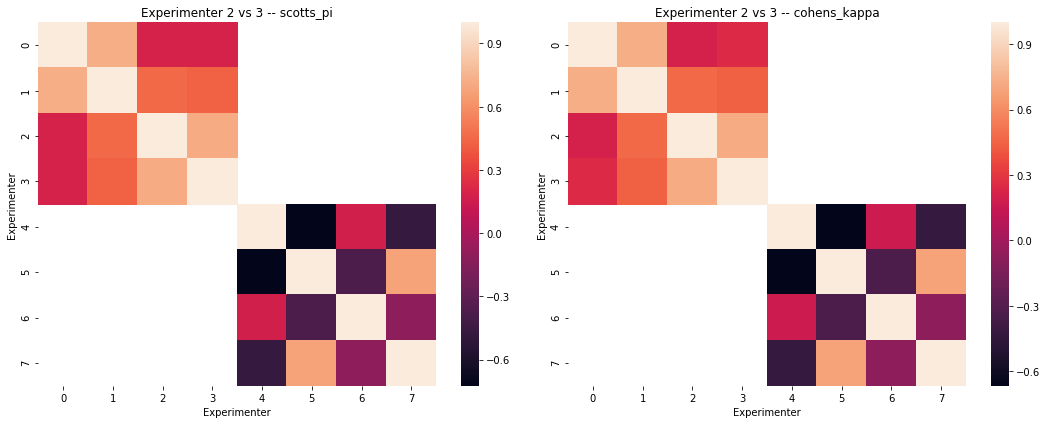

In [11]:
# scotts_pi between Experimenters 2 and 3
scotts_pi(anno.annotations[:,1], anno.annotations[:,2])
# fleiss_kappa for all Experimenters 1~8
fleiss_kappa(anno.annotations[::])
# krippendorffs_alpha for all Experimenters 1~8
krippendorffs_alpha(anno.annotations[::])
# cohens_kappa between Experimenters 2 and 3
cohens_kappa(anno.annotations[:,0], anno.annotations[:,1])

# create the pairwise matrixs
m_scotts = pairwise_matrix(scotts_pi, anno.annotations)
m_cohens = pairwise_matrix(cohens_kappa, anno.annotations)

plt.figure(figsize = (15,6))

ax = plt.subplot(121)
# scotts_pi
ax = seaborn.heatmap(m_scotts)
ax.set_title("Scotts_pi")
ax.set_xlabel("Experimenter")
ax.set_ylabel("Experimenter")

ax = plt.subplot(122)
# cohens_kappa
ax = seaborn.heatmap(m_cohens)
ax.set_title("Cohens_kappa")
ax.set_xlabel("Experimenter")
ax.set_ylabel("Experimenter")

plt.tight_layout()
plt.show()

### <span style="color:purple"> 2.4 Other measures: the average Cohen's $\kappa$, cohens_weighted_$\kappa$

<span style="color:purple">**Interesting Question:** <br>
How to quantitatively show the agreement achieved in survey version 1 is larger that that of survey version 2? <br>

<span style="color:purple">**Method:** <br>
Calculate the average cohens kappa values for survey version 1 goup and survey verison 2 group. <br>
    
<span style="color:purple">**Findings:** <br>
The average cohens kappa for Experimenters 1~4 in survey version 1 is:  0.6666666666666666 <br>
The average cohens kappa for Experimenters 5~8 in survey version 2 is:  -0.3333333333333333 <br>
The average weighted cohens kappa for Experimenters 1~4 in survey version 1 is:  0.8666666666666666 <br>
The average weighted cohens kappa for Experimenters 5~8 in survey version 2 is:  -0.3333333333333333 <br>
Therefore, Experimenters 1~4 in survey version 1 achieve larger extent of agreement than their counterparty. <br>

In [21]:
# define function for pairwise_metric_average
def pairwise_metric_average(metric, array):
    """Calculate the pairwise metric average for the real elements of metric function run on an array of annotations"""
    p = permutations(range(array[0,:].size),2)
    m = [metric(array[:,x[0]], array[:,x[1]]) for x in p]
    clean_m = [c for c in m if not math.isnan(c)]
    return reduce(lambda a, b: a + b, clean_m)/len(clean_m)    

In [29]:
# the average cohens_kappa
m_ave_cohens_1_4 = pairwise_metric_average(cohens_kappa, anno.annotations[0:3,0:3])
m_ave_cohens_5_8 = pairwise_metric_average(cohens_kappa, anno.annotations[4:7,4:7])

# the average weighted kappa
m_ave_weighted_cohens_1_4 = pairwise_metric_average(cohens_weighted_kappa,anno.annotations[0:3,0:3])
m_ave_weighted_cohens_5_8 = pairwise_metric_average(cohens_weighted_kappa,anno.annotations[4:7,4:7])
print('The average cohens kappa for Experimenters 1~4 in survey version 1 is: ', m_ave_cohens_1_4)
print('The average cohens kappa for Experimenters 5~8 in survey version 2 is: ', m_ave_cohens_5_8)
print('The average weighted cohens kappa for Experimenters 1~4 in survey version 1 is: ', m_ave_weighted_cohens_1_4)
print('The average weighted cohens kappa for Experimenters 5~8 in survey version 2 is: ', m_ave_weighted_cohens_5_8)
print('Therefore, Experimenters 1~4 in survey version 1 achieve larger extent of agreement than their counterparty.')


The average cohens kappa for Experimenters 1~4 in survey version 1 is:  0.6666666666666666
The average cohens kappa for Experimenters 5~8 in survey version 2 is:  -0.3333333333333333
The average weighted cohens kappa for Experimenters 1~4 in survey version 1 is:  0.8666666666666666
The average weighted cohens kappa for Experimenters 5~8 in survey version 2 is:  -0.3333333333333333
Therefore, Experimenters 1~4 in survey version 1 achieve larger extent of agreement than their counterparty.


## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, use the results of your content annotation survey to predict high and low-quality analysts, then predict MLE or MAP estimates for your codes in question. What do these estimates suggest about the distribution of skill among your coders? How different are these estimates from a majority vote?

## <span style="color:purple"> 3 Experimenters with different ability<br>

<span style="color:purple">**Motivation:** <br>
Since the news are about finance, business and economics, experimenters with different backgrounds may have different tastes of my texts (like or dislike), or different extents of (willingness to) understanding the text and then evaluate its sentiment. This reflects the fact that *"No all experimenters are equally good, some may be worse than others."* <br>

<span style="color:purple"> **Interesting Question:**<br>
How to incorporate the fact that experimenters are heterogeneous in terms ofability of answering the survey questions? <br>

<span style="color:purple"> **Methods: ** <br>
(1) There are two recommended models to apply, namely ModelB and ModelBt. They could downweight those "inferior" experimenters' answers. <br> Moreover, there are two approaches to estimate the parameters in ModelB and ModelBt, namely MAP and MLE. I will use both and compare their outcomes. Heatplots will show how the "mode" answers get more weights than the "rare" answers. <br>
(2) Visualize the experimenters' performances. <br>
    
    
<span style="color:purple"> **Findings: ** <br>
(1) In **3.1.1** heatplots, it clearly shows that the answers with the largest frequency (shown in the right heatplot) have been assigned to more weights (as indicated by larger values shown in the left heatplot). This means that the model help weighted the answers and avoid getting distorded by deviant answers which could be a careless mistake or non-sense/ random "clicking". <br>
    
(2) Compare the heatplots in **3.1.1 (MAP)** and **3.1.2 (MLE)**. It shows that the weights assigned by ModelB with MLE are more coarse than those by ModelB with MAP. So I personally prefer ModelB with MLE. But I do not know their performances for other dataset. So in the future research, I will do both and choose the one which givesm me more finery weights assignments. <br>

### <span style="color:purple"> 3.1 ModelB and MAP/MLE<br>

#### <span style="color:purple"> 3.1.1 ModelB with MAP<br>

In [32]:
# create a new instance of model B, with 5 label classes and 8 experimenters
model = ModelB.create_initial_state(5,8)
# other model parameters are initialized from the model prior
print(model.theta)
print(model.log_likelihood(anno.annotations))

[[[5.76362578e-01 1.94407242e-01 1.61611265e-01 5.93399694e-02
   8.27894620e-03]
  [1.17826986e-02 6.02501178e-01 3.40780421e-01 1.67229784e-02
   2.82127239e-02]
  [6.99581393e-02 1.81778791e-01 5.47851125e-01 8.81998218e-02
   1.12212122e-01]
  [1.52919294e-02 1.84917877e-01 1.35907893e-01 5.72672042e-01
   9.12102575e-02]
  [6.25050651e-03 2.94275925e-02 3.40422959e-02 1.75910244e-01
   7.54369361e-01]]

 [[7.16243149e-01 7.45794345e-02 1.24093506e-01 3.99454184e-02
   4.51384927e-02]
  [9.15115296e-02 5.77461177e-01 2.85254153e-01 4.50494711e-02
   7.23668588e-04]
  [9.90846716e-02 2.79598138e-01 3.79858276e-01 1.92992390e-01
   4.84665252e-02]
  [1.78701845e-01 5.27511640e-02 1.19334064e-01 4.40753051e-01
   2.08459875e-01]
  [4.61545825e-02 5.13718345e-02 1.31063065e-01 1.45503885e-01
   6.25906633e-01]]

 [[6.57214970e-01 2.10351369e-01 1.29877519e-01 2.39407694e-03
   1.62064324e-04]
  [4.58413612e-02 5.98256591e-01 1.79913891e-01 1.01653812e-01
   7.43343447e-02]
  [3.5363320

<span style="color:purple">**Function:**<br>
<span style="color:purple">**sample_posterior_over_accuracy(annotations, nsamples, burn_in_samples=0, thin_samples=1)** <br>
Draw samples from P(accuracy parameters | data, model parameters). The accuracy parameters control the probability of an annotator reporting the correct label (the exact nature of these parameters varies from model to model). <br>
Return samples from posterior over the accuracy parameters.

<span style="color:purple">**Parameters:** <br>
(1) annotations (ndarray, shape = (n_items, n_annotators)) – annotations[i,j] is the annotation of annotator j for item i <br>
(2) nsamples (int) – Number of samples to return (i.e., burn-in and thinning samples are not included) <br>
(3) burn_in_samples (int) – Discard the first burn_in_samples during the initial burn-in phase, where the Monte Carlo chain converges to the posterior <br>
(4) thin_samples (int) – Only return one every thin_samples samples in order to reduce the auto-correlation in the sampling chain. This is called “thinning” in MCMC parlance <br>

In [33]:
samples = model.sample_posterior_over_accuracy(anno.annotations, 10, burn_in_samples=2, thin_samples=1)


In [34]:
# For MAP
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[[[7.89473684e-001 1.57894737e-001 5.26315789e-002 1.84738835e-170
   0.00000000e+000]
  [1.60133796e-001 6.79229471e-001 1.20110931e-001 4.05258022e-002
   0.00000000e+000]
  [4.16418200e-002 1.26336152e-001 6.24407209e-001 1.65987304e-001
   4.16275154e-002]
  [0.00000000e+000 4.54545455e-002 1.36363636e-001 6.81818182e-001
   1.36363636e-001]
  [0.00000000e+000 0.00000000e+000 4.99992387e-002 1.50013384e-001
   7.99987377e-001]]

 [[7.89473684e-001 1.57894737e-001 5.26315789e-002 0.00000000e+000
   0.00000000e+000]
  [1.60133796e-001 6.79229471e-001 1.20599756e-001 4.00369771e-002
   0.00000000e+000]
  [4.16418200e-002 1.26336152e-001 6.65513071e-001 1.24881442e-001
   4.16275154e-002]
  [0.00000000e+000 4.54545455e-002 1.36363636e-001 6.81818182e-001
   1.36363636e-001]
  [0.00000000e+000 0.00000000e+000 5.00149067e-002 1.49997716e-001
   7.99987377e-001]]

 [[7.89473684e-001 1.57894737e-001 5.26315789e-002 1.50647899e-144
   0.00000000e+000]
  [1.20110931e-001 6.80607277e-001 1.20

/home/jingyingb/.local/lib/python3.6/site-packages/pyanno/util.py:80: RuntimeWarning: divide by zero encountered in log
  log_theta = ninf_to_num(log(theta))


<span style="color:purple">**Functions:**<br> 
(1) infer_labels(annotations) <br>
Infer posterior distribution over label classes. Compute the posterior distribution over label classes given observed annotations, P(y|x). <br>

<span style="color:purple">(2) posterior (ndarray, shape = (n_items, n_classes)) <br>
posterior[i,k] is the posterior probability of class k given the annotation observed in item i.

In [35]:
def makeQuestionComparison(model, anno_target, num_questions = 10):
    votes = []
    for r in anno_target.annotations:
        v = [0] * len(anno_target.labels)
        votes.append(v)
        for a in r:
            if a > -1:
                v[a] += 1
    votes_array = np.array(votes)
    posterior = model.infer_labels(anno_target.annotations)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (25, 15), sharey=True)

    seaborn.heatmap(np.nan_to_num(posterior,0)[:num_questions], annot=True, ax =ax1)
    seaborn.heatmap(votes_array[:num_questions], annot = True, ax=ax2)
    
    ax1.set_title("Model")
    ax1.set_xlabel("5 Phnomena")
    ax1.set_ylabel("10 Questions")
    ax2.set_title("Sentiment Evaluations")
    ax2.set_xlabel("5 Phnomena")
    #ax2.set_ylabel("10 Questions")
    return fig, (ax1, ax2)

(<matplotlib.figure.Figure at 0x7fecaa39c358>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7fecaa382c50>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fecaa32d780>))

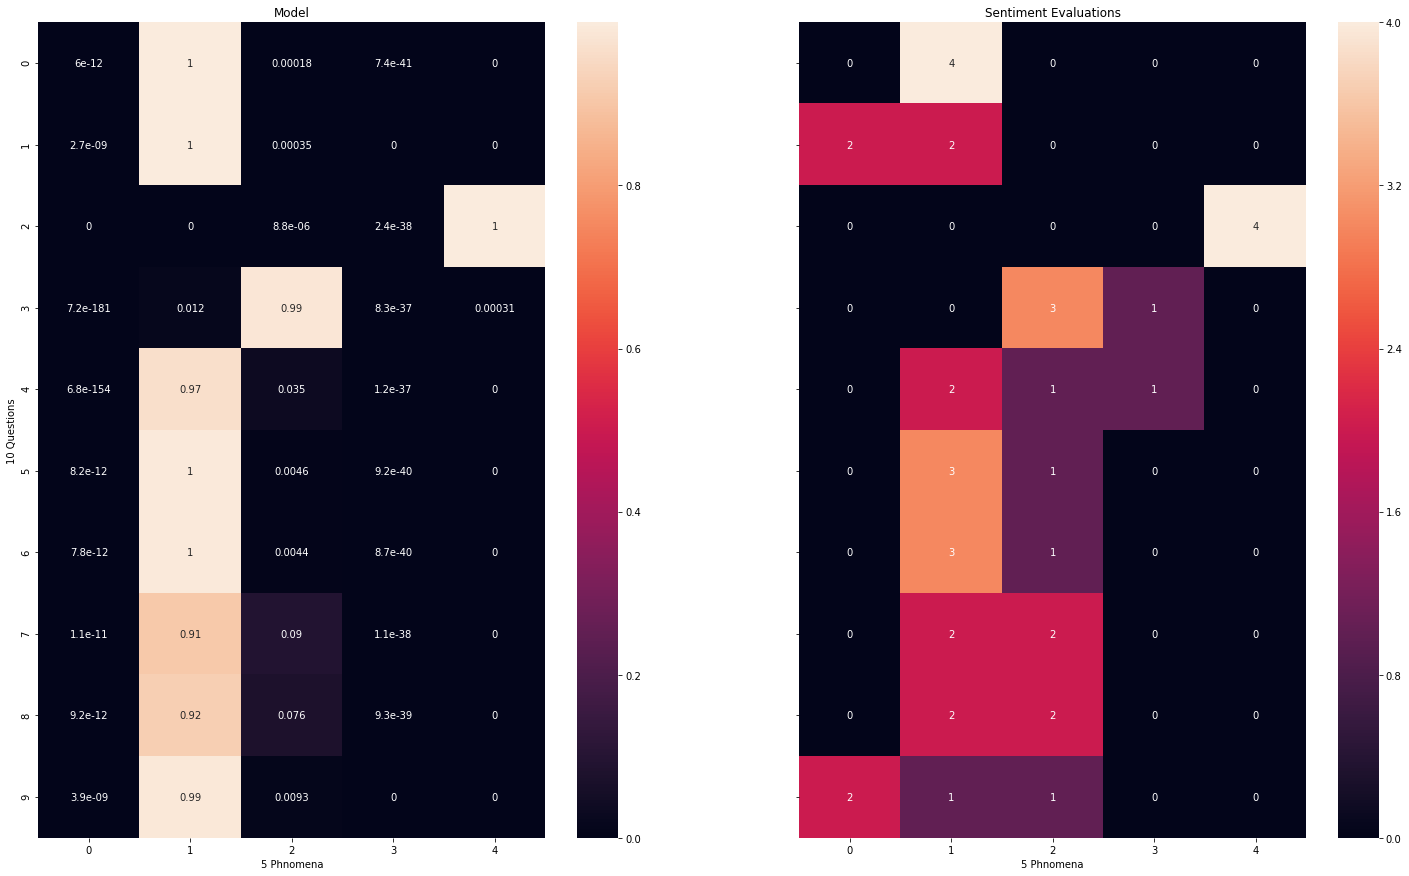

In [36]:
makeQuestionComparison(model, anno)

#### <span style="color:purple"> 3.1.2 ModelB with MLE<br>

In [30]:
# For MLE
model_MLE = ModelB.create_initial_state(5,8)
model_MLE.mle(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[0.79476342 0.99999995 0.55113475 0.54626472 0.1905437  0.8081601
 0.42631464 1.        ]
-48.163311600691095


(<matplotlib.figure.Figure at 0x7fed0aa8d470>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7feccc9a6dd8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fed0aaea860>))

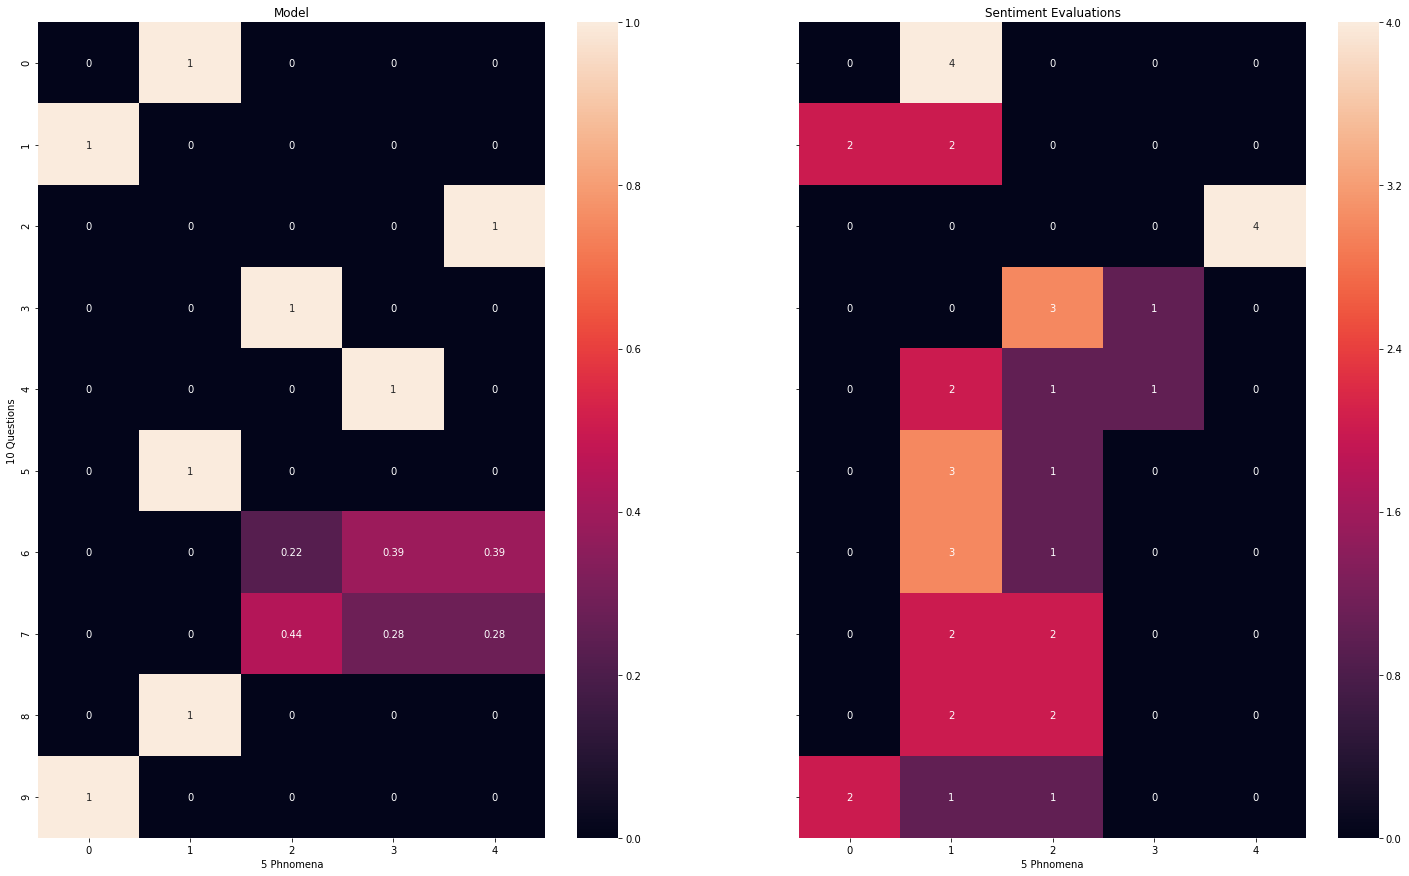

In [31]:
makeQuestionComparison(model_MLE, anno)

### <span style="color:purple"> 3.2 Visualizing coder accuracy <br>
<span style="color:purple"> Plot of the accuracy for each annotator inferred from ModelB <br>
<span style="color:purple"> **Findings:** <br>
Basically, the first four experimenters' performance are stable and satisfying. This has already been notified in **2.3** heatplots. In contrast, the performances, in terms of accuracy, of experimenters 5~8 in the survey version 2 vary a lot. Experimenter 4 has extremely low value. This is consistent with the findings in **2.3** heatplot where the extents of agreement between Experimenter 4 and other experimenters is rather low! <br>
Therefore, I would say the data quality in the survey version 1 is better. <br> However, there are many loopholes for this argument. For instance, this survey is to evaluate the sentiment, people very likely have different measure of how "terrible", "bad", "good" the given texts are. Moreover, my sample size is too small to give reliable results. <br>

In [24]:
# Plot of the accuracy for each annotator inferred from ModelB
model = ModelBt.create_initial_state(5,8)
model.mle(anno.annotations)
samples = model.sample_posterior_over_accuracy(anno.annotations, 10, burn_in_samples=2, thin_samples=1)
y =  samples.mean(axis=0)
y_ci = samples.std(axis=0)

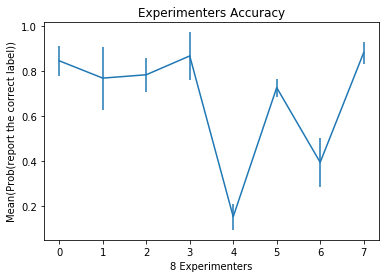

In [27]:
plt.figure()
plt.errorbar(range(8),y, yerr = y_ci)
plt.title('Experimenters Accuracy')
plt.xlabel('8 Experimenters')
plt.ylabel('Mean(Prob(report the correct label))')
plt.show()

<span style="color:purple"><span style="color:purple">*----------------END----------------* <br>
<span style="color:purple">February 7th, 2018 at Regenstein Library <br>
<span style="color:purple">Jingying Bi <br>